# Logistic Regression - Complete ML Pipeline

This notebook demonstrates a complete machine learning pipeline for logistic regression including:
- Data loading and exploration
- Data preprocessing (one-hot encoding, categorical encoding, normalization)
- Model training with hyperparameter optimization
- Model evaluation

Dataset: Iris dataset from sklearn (publicly available)

## 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Set random seed for reproducibility
np.random.seed(42)

Matplotlib is building the font cache; this may take a moment.


## 2. Load and Explore Data

In [2]:
# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target
df['species'] = df['target'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Dataset shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset shape: (150, 6)

First few rows:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [3]:
# Basic statistics
print("Dataset statistics:")
df.describe()

Dataset statistics:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [4]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

# Check class distribution
print("\nClass distribution:")
print(df['species'].value_counts())

Missing values:
sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
species              0
dtype: int64

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


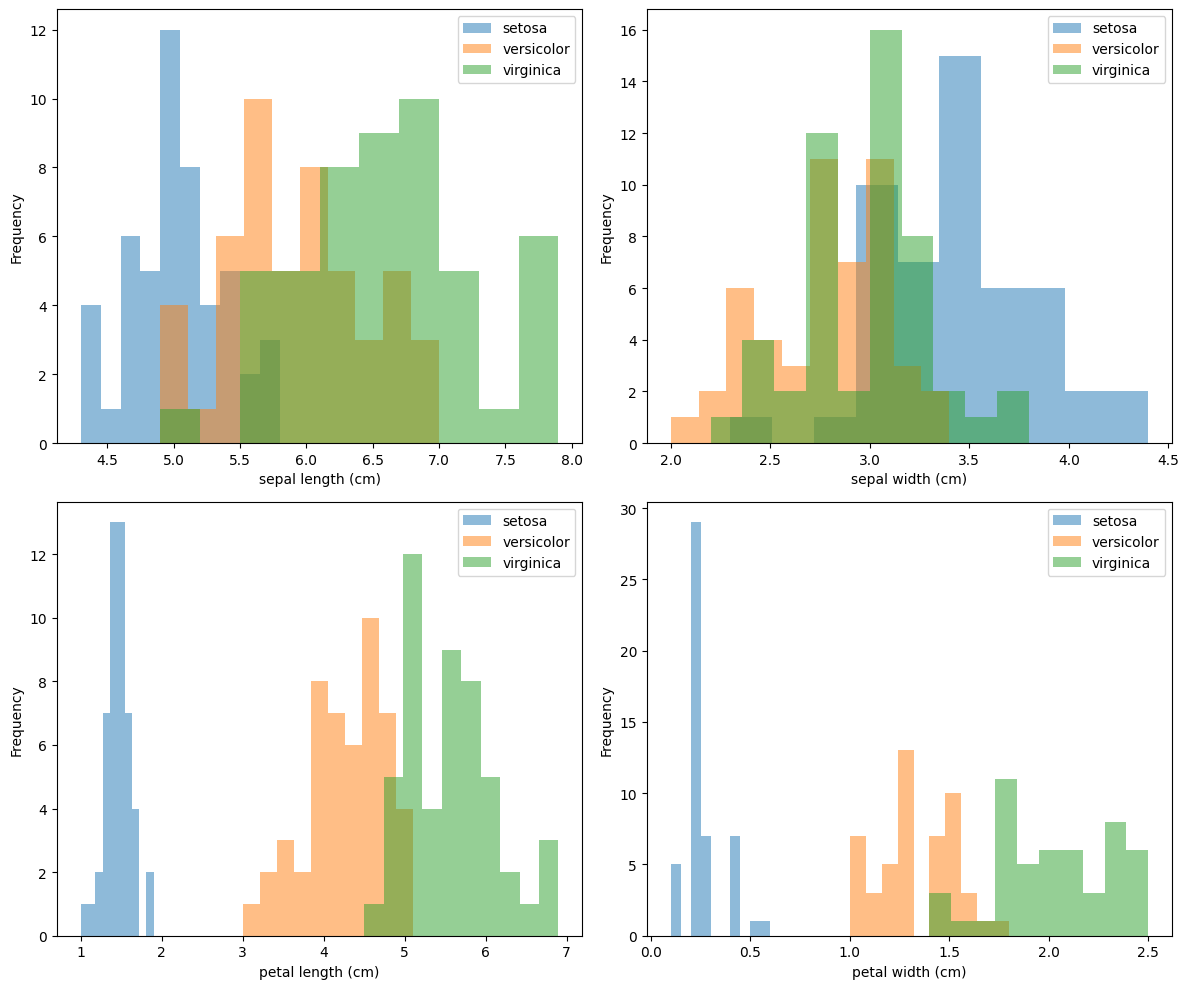

In [5]:
# Visualize data distribution
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for idx, col in enumerate(iris.feature_names):
    ax = axes[idx // 2, idx % 2]
    for species in df['species'].unique():
        data = df[df['species'] == species][col]
        ax.hist(data, alpha=0.5, label=species)
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
plt.tight_layout()
plt.show()

## 3. Data Preprocessing

### 3.1 Categorical Encoding

In [6]:
# For demonstration, we'll show both Label Encoding and One-Hot Encoding

# Label Encoding for target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['species'])

print("Original species:", df['species'].unique())
print("Encoded labels:", np.unique(y))
print("Mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

Original species: <StringArray>
['setosa', 'versicolor', 'virginica']
Length: 3, dtype: str
Encoded labels: [0 1 2]
Mapping: {'setosa': np.int64(0), 'versicolor': np.int64(1), 'virginica': np.int64(2)}


In [ ]:
# One-Hot Encoding example (for categorical features if any)
# In this dataset, we don't have categorical features, but we'll demonstrate the technique

# Create a sample categorical feature for demonstration
df['size_category'] = pd.cut(df['sepal length (cm)'], bins=3, labels=['small', 'medium', 'large'])

# One-Hot Encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid multicollinearity
size_encoded = one_hot_encoder.fit_transform(df[['size_category']])
size_encoded_df = pd.DataFrame(size_encoded, columns=one_hot_encoder.get_feature_names_out(['size_category']))

print("One-Hot Encoded size_category:")
print(size_encoded_df.head())

# Multi-collinearity is where 2 independent variables are highly correlated, leading to redundancy in the model.
# By doing drop=first, we remove the first categorical category to reduce multi-collinearity.
# For example, if we have categories ['small', 'medium', 'large'], 
# 	we know that a data point would be small if it is neither medium or large which is multi-collinearity.
# Multi-collinearity is also called dummy variable trap.

One-Hot Encoded size_category:
   size_category_medium  size_category_small
0                   0.0                  1.0
1                   0.0                  1.0
2                   0.0                  1.0
3                   0.0                  1.0
4                   0.0                  1.0


### 3.2 Feature Selection and Train-Test Split

In [12]:
# Select features (using original numeric features)
X = df[iris.feature_names].values

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

Training set size: (120, 4)
Test set size: (30, 4)


### 3.3 Feature Normalization

In [13]:
# Standardize features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Original feature means:", X_train.mean(axis=0))
print("Original feature stds:", X_train.std(axis=0))
print("\nScaled feature means:", X_train_scaled.mean(axis=0))
print("Scaled feature stds:", X_train_scaled.std(axis=0))

Original feature means: [5.84166667 3.04833333 3.77       1.205     ]
Original feature stds: [0.837415   0.44665112 1.761136   0.75947899]

Scaled feature means: [-1.20829273e-15 -2.03679666e-15  4.99600361e-16  1.67458640e-15]
Scaled feature stds: [1. 1. 1. 1.]


## 4. Model Training with Hyperparameter Optimization

In [14]:
# Define hyperparameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

# Create base model
base_model = LogisticRegression(random_state=42)

# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(
    base_model,
    param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Starting hyperparameter optimization...")
grid_search.fit(X_train_scaled, y_train)
print("\nOptimization complete!")

# liblinear is a good choice for small datasets and when you have a lot of features.
# saga means stochastic average gradient works well for large datasets and supports multinomial loss.

Starting hyperparameter optimization...
Fitting 5 folds for each of 72 candidates, totalling 360 fits


/Users/kartikshenoy/anaconda3/envs/main/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
/Users/kartikshenoy/anaconda3/envs/main/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1160: UserWarning: Inconsistent values: penalty=l1 with l1_ratio=0.0. penalty is deprecated. Please use l1_ratio only.
  warnings.warn(
/Users/kartikshenoy/anaconda3/envs/main/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_rat


Optimization complete!


In [15]:
# Best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Get the best model
best_model = grid_search.best_estimator_

Best parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
Best cross-validation score: 0.9666666666666668


In [19]:
# Display top 5 parameter combinations
results_df = pd.DataFrame(grid_search.cv_results_)
results_df = results_df.sort_values('rank_test_score')
print("\nTop 5 parameter combinations:")
results_df[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']].head()


Top 5 parameter combinations:


,params,mean_test_score,std_test_score,rank_test_score
25,"{'C': 0.1, 'max_iter': 100, 'penalty': 'l1', '...",0.966667,0.03118,1
29,"{'C': 0.1, 'max_iter': 200, 'penalty': 'l1', '...",0.966667,0.03118,1
55,"{'C': 10, 'max_iter': 200, 'penalty': 'l2', 's...",0.966667,0.03118,1
53,"{'C': 10, 'max_iter': 200, 'penalty': 'l1', 's...",0.966667,0.03118,1
61,"{'C': 100, 'max_iter': 100, 'penalty': 'l1', '...",0.966667,0.03118,1


## 5. Model Evaluation

In [20]:
# Make predictions
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)

# Calculate accuracies
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 0.9583333333333334
Test Accuracy: 0.9


In [21]:
# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred, target_names=iris.target_names))


Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.89      0.80      0.84        10
   virginica       0.82      0.90      0.86        10

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30



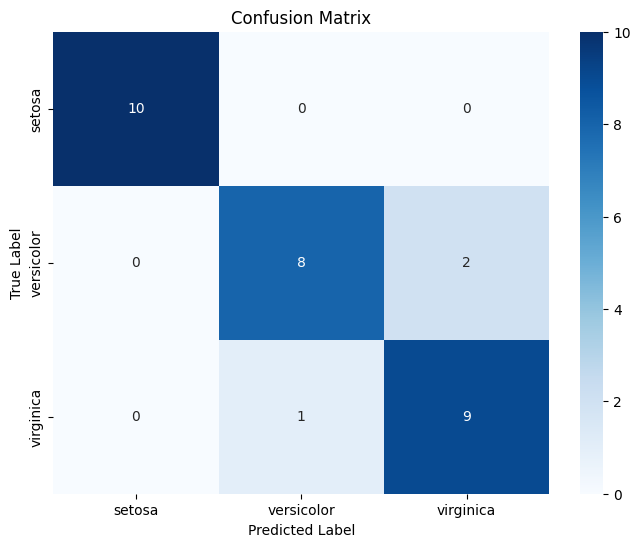

In [22]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

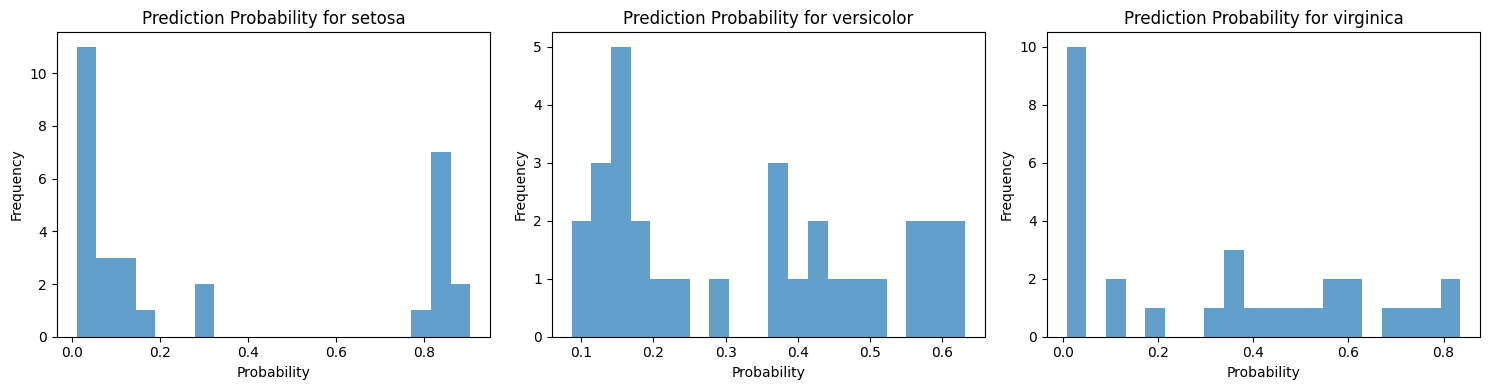

In [23]:
# Get prediction probabilities
y_test_proba = best_model.predict_proba(X_test_scaled)

# Visualize predictions with confidence
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
for i, species in enumerate(iris.target_names):
    axes[i].hist(y_test_proba[:, i], bins=20, alpha=0.7)
    axes[i].set_title(f'Prediction Probability for {species}')
    axes[i].set_xlabel('Probability')
    axes[i].set_ylabel('Frequency')
plt.tight_layout()
plt.show()

## 6. Model Coefficients Analysis

Model Coefficients:
            sepal length (cm)  sepal width (cm)  petal length (cm)  \
setosa                    0.0          0.000000          -1.832787   
versicolor                0.0         -0.230353           0.000000   
virginica                 0.0          0.000000           0.000000   

            petal width (cm)  
setosa              0.000000  
versicolor          0.000000  
virginica           1.521099  


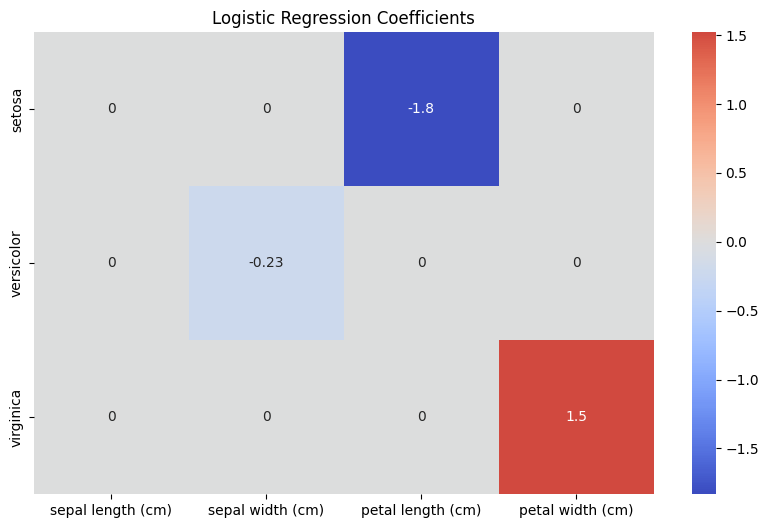

In [24]:
# Display model coefficients
coef_df = pd.DataFrame(
    best_model.coef_,
    columns=iris.feature_names,
    index=iris.target_names
)

print("Model Coefficients:")
print(coef_df)

# Visualize coefficients
plt.figure(figsize=(10, 6))
sns.heatmap(coef_df, annot=True, cmap='coolwarm', center=0)
plt.title('Logistic Regression Coefficients')
plt.show()

## Summary

This notebook demonstrated a complete machine learning pipeline for logistic regression:

1. **Data Loading and Exploration**: Loaded the Iris dataset and performed exploratory data analysis
2. **Data Preprocessing**:
   - Label encoding for target variable
   - One-hot encoding demonstration for categorical features
   - Feature normalization using StandardScaler
3. **Model Training**: Used GridSearchCV for hyperparameter optimization
4. **Model Evaluation**: Assessed model performance using accuracy, classification report, and confusion matrix
5. **Model Interpretation**: Analyzed model coefficients to understand feature importance

Key takeaways:
- Always normalize/standardize features for logistic regression
- Use cross-validation for hyperparameter tuning to avoid overfitting
- Evaluate models using multiple metrics
- Interpret model coefficients to understand feature contributions